### Проект: Аналитика данных сети фитнес-центров «Культурист-датасаентист»

***Описание проекта***

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. 

Ваша задача — провести анализ и подготовить план действий по удержанию клиентов. 

***Описание данных***

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

Путь к файлу: /datasets/gym_churn.csv.

Набор данных включает следующие поля.

Данные клиента за предыдущий до проверки факта оттока месяц: 
* gender — пол;
* Near_Location — проживание или работа в районе, где находится фитнес-центр;
* Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* Phone — наличие контактного телефона;
* Age — возраст;
* Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 

* Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
* Group_visits — факт посещения групповых занятий;
* Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
* Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
* Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* Churn — факт оттока в текущем месяце.


**Цели исследования**

* Проведение исследовательского анализ данных (EDA)
* Построение модели прогнозирования оттока клиентов
* Кластеризация клиентов
* Форулировка выводов и создание базовых рекомендаций по работе с клиентами

Проведите исследовательский анализ данных (EDA).

* Посмотрите на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

Постройте модель прогнозирования оттока клиентов.

Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

* Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
* Обучите модель на train-выборке двумя способами: 
 * логистической регрессией,
 * случайным лесом.
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

Сделайте кластеризацию клиентов.

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

* Стандартизируйте данные.
* Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами.

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания. 
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.


### Шаг 1. Загрузка данных

***Импортируем библиотеки***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore') 

***Импортируем данные в датасет***

In [2]:
try:
    df_gym = pd.read_csv('/datasets/gym_churn.csv')
except:
    df_gym = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

***Проверяем и выводим данные***

In [3]:
def inspect(df):
    pd.options.display.max_colwidth = 120
    display(df.head(10)) 
    df.info()
    print ('Количество дубликатов -', df.duplicated().sum())
    print ('Количество пропусков:')
    print(df.isna().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
df_gym = inspect(df_gym)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1    3381
0     619
Name: near_location, dtype: int64

**************************************************


0    2053
1    1947
Name: partner, dtype: int64

**************************************************


0    2766
1    1234
Name: promo_friends, dtype: int64

**************************************************


1    3614
0     386
Name: phone, dtype: int64

**************************************************


1     2207
12     960
6      833
Name: contract_period, dtype: int64

**************************************************


0    2351
1    1649
Name: group_visits, dtype: int64

**************************************************


29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: age, dtype: int64

**************************************************


89.952762     1
174.658455    1
122.765563    1
204.444527    1
50.813166     1
             ..
272.997181    1
115.130268    1
133.525137    1
201.447650    1
218.979321    1
Name: avg_additional_charges_total, Length: 4000, dtype: int64

**************************************************


1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

**************************************************


1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
19      7
18      7
20      7
21      5
26      2
24      2
22      2
23      2
27      1
29      1
31      1
Name: lifetime, dtype: int64

**************************************************


0.000000    88
0.827058     1
2.770845     1
1.472779     1
3.735185     1
            ..
2.602823     1
1.295159     1
1.138963     1
2.262743     1
0.992312     1
Name: avg_class_frequency_total, Length: 3913, dtype: int64

**************************************************


0.000000    181
0.379235      1
0.054540      1
1.877288      1
1.058906      1
           ... 
3.115417      1
3.429058      1
3.233156      1
2.564243      1
1.454710      1
Name: avg_class_frequency_current_month, Length: 3820, dtype: int64

**************************************************


0    2939
1    1061
Name: churn, dtype: int64

**************************************************


***Для наглядности построим гистограммы по данным датафреймов***

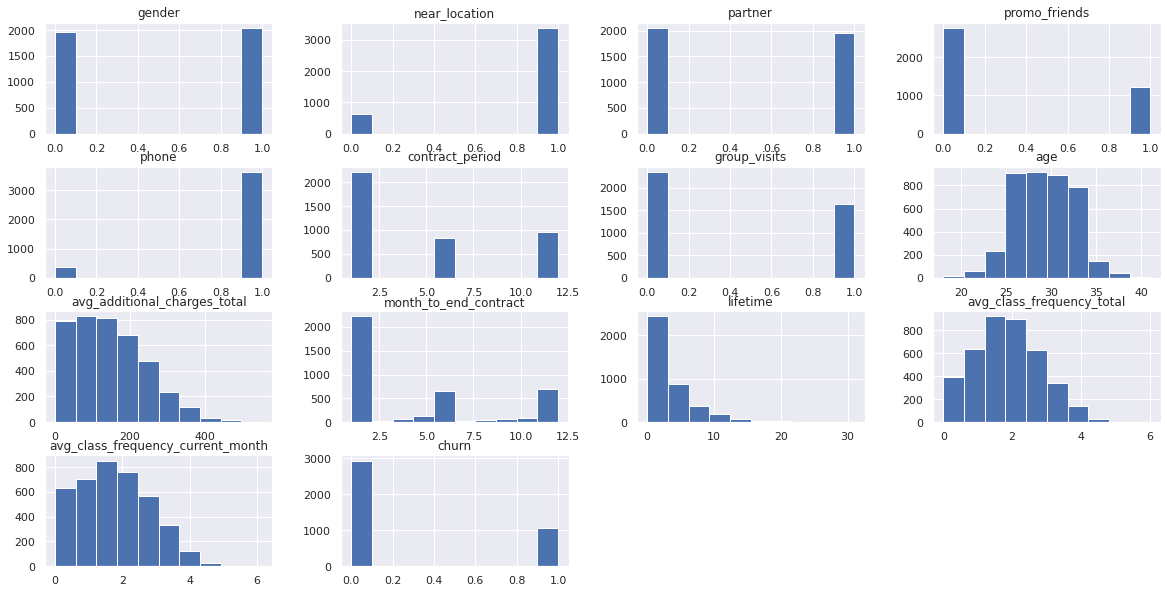

In [4]:
df_gym.hist(figsize=(20, 10));

**Вывод:**

В датафрейме df_gym присутствует 14 столбцов, он состоит из 4000 строк. Вес 437.6 KB. 

Пропуски и дубликаты отсутствуют.

Названия столбцов в датафрейме нужно привести к нижнему регистру.

Данные выглядят равномерно распределенными, стандартные отклонения не сильно далеко от средних. Также, не похоже, что есть какие-то выбросы.

### Шаг 2. Исследовательский анализ данных (EDA)

***Изменим настройки отображения***

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

***Приведём названия столбцов в датафрейме к стандартному стилю***

In [6]:
df_gym.columns = [x.lower() for x in df_gym.columns.values]
df_gym.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


***Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался***

In [7]:
df_gym['churn'].unique()

array([0, 1])

Столбец **churn** содержит 0 (остался) и 1 (ушел)

In [8]:
df_gym.groupby('churn').mean().T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


**Вывод**

Поле gender - среднее одинаково, получается, что этот признак не сильно влияет на отток или приток.

Поле near_location - хорошие показатели. Это значит, что больше клиентов живут или работают рядом с залом. Возможно, отток клиентов может быть именно у тех, кто живет далеко.

Поле partner - ушедших клиентов меньше тех, кто является партнером.

Поле promo_friends - у ушедших почти в два раза меньше кто пришел от друга.

Поле phone - большой показатель того, что многие оставили номера телефонов в анкетах. Здесь не очень большое влияние на отток клиентов.

Поле contract_period - тут высокое влияние признака на клиентов. Если абонемент куплен на год или больше, то у клиентов есть стимул продолжать ходить в зал. А если абонемент куплен на месяц или три, то есть вероятность что клиент бросит проходив небольшое время.

Поле group_visits - этот столбец тоже дает положительное влияние на посещаемость. Могут быть налажены контакты с тренером, либо с людьми, которые ходят на групповые занятия. Это заставляет человека ходить чаще, ведь когда ты не один занимаешься каким-либо делом, то это еще приятнее и дает стимул продолжать. А вот ушедшие клиенты меньше посещали групповые занятия.

Поле age - возраст ушедших клиентов меньше, чем у оставшихся.

Поле avg_additional_charges_total - тут видно, что люди не сильно тратят деньги на какие-либо дополнительные услуги. Им больше интересно то, что входит в саму стоимость абонемента. Т.е., ушедшие клиенты меньше тратили на дополнительные услуги фитнес-центра. 

Поле month_to_end_contract	- этот столбец дает больше информации. Можно понять, сколько клиенту осталось отходить на занятия и в будущем дает понимание, как и когда можно привлечь клиента и оставить его в бизнесе. Количество месяцев до окончания срока абонемента у постоянных клиентов почти 5.3 месяца, а у ушедших почти 1.7 месяца.

Поле lifetime - довольно сильный показатель. Чем дольше человек ходит, тем это сильнее закрепляется у него в привычке.
Среднее количество месяцев с первого обращение у постоянных составляет 4.7, а у ушедших почти 1 месяц.

Поле avg_class_frequency_total - здесь не сильное влияние показателя, потому что люди ходят по разному, у всех бывают причины сделать перерыв, либо увеличить количество тренировок. Тоесть, все зависит от обстоятельств. Ну и привычки тоже никуда не деваются. у постоянных клиентов составляет 2 месяца, у ушедших около 1,5.

Поле avg_class_frequency_current_month - тут можно сказать о том, чем чаще ходит клиент в зал, тем больше у него в данный период стимулов продолжать заниматься спортом и сильнее привычка. Постоянные клиенты, в среднем, посещают фитнес-центр 2 раза в неделю, ушедшие клиенты 1 раз в неделю.

***Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)***

In [9]:
stay_out_list = df_gym[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']]

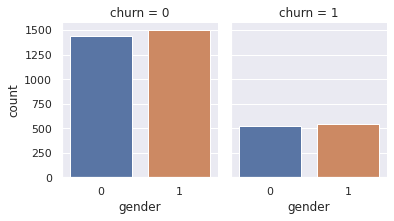

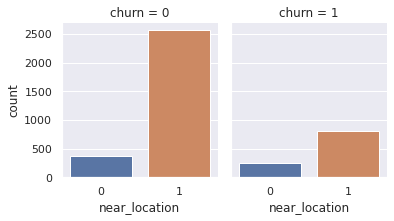

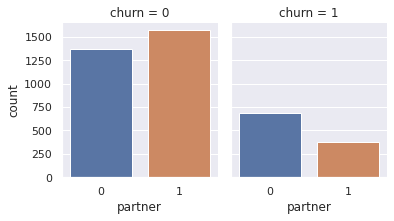

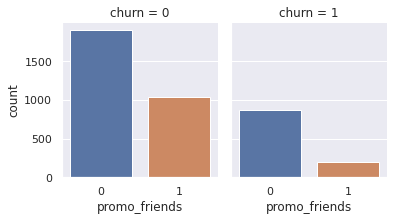

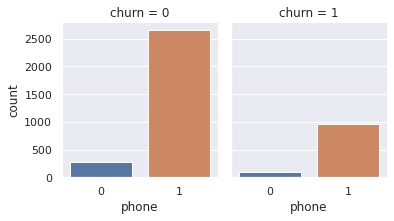

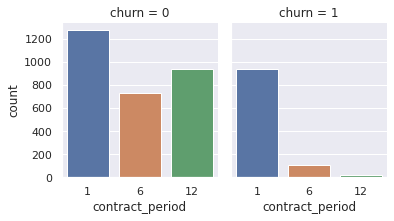

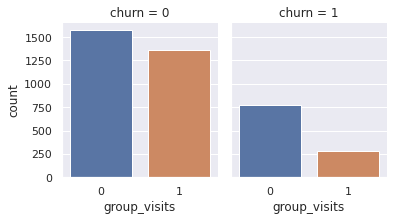

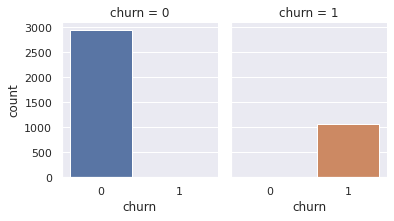

In [10]:
for col in stay_out_list.columns:
    sns.catplot(col, col='churn', data=stay_out_list, kind='count', height=3, aspect=.9)

**Вывод**

Поле gender - пол всё же не влияет на отток клиентов.

Поле near_location - остаются больше те, кто живет или работают рядом.

Поле partner - ушедших клиентов все же меньше тех, кто является партнером.

Поле promo_friends - уходят больше тех, кто пришел без промо.

Поле phone - остаются те, кто оставлял свои контактные данные.

Поле contract_period - уходят больше те, у кого длительность текущего абонемента составляет один или три месяца.

Поле group_visits - говорит о том, что те, кто не посещали групповые занятия уходят больше.

***Посмотрим на числовые признаки***

Переназовем столбцы для лучшего понимания: 0 - mean_stay, 1 - mean_out.

In [11]:
mean_stay = df_gym.query('churn == 0')
mean_out = df_gym.query('churn == 1')

In [12]:
churn = pd.DataFrame({'Среднее значение кто ушел': mean_out.mean(),
                           'Среднее значение кто остался': mean_stay.mean()})

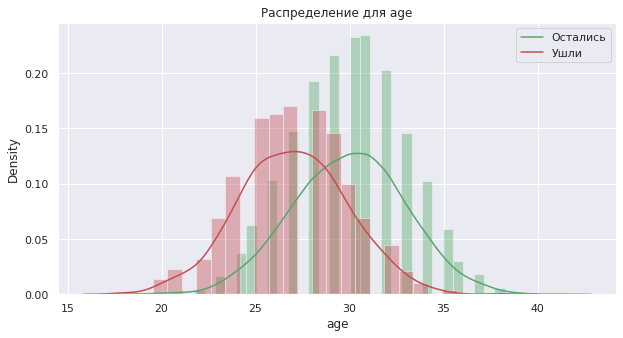

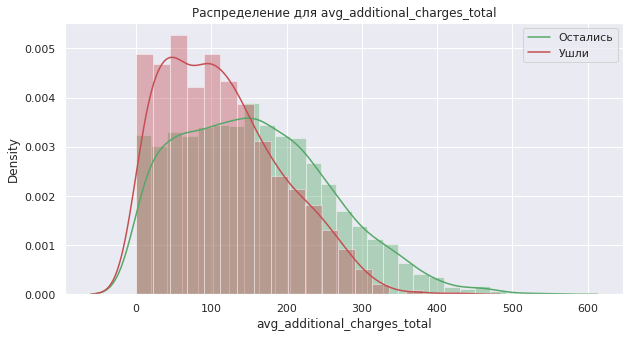

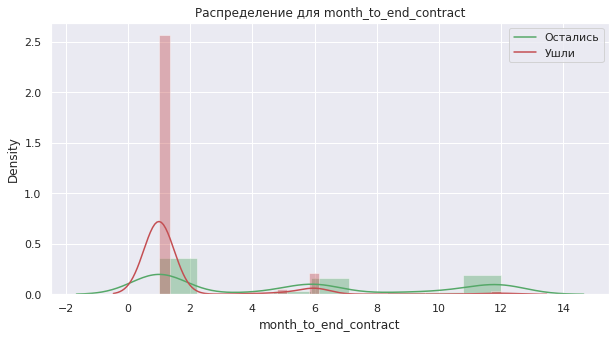

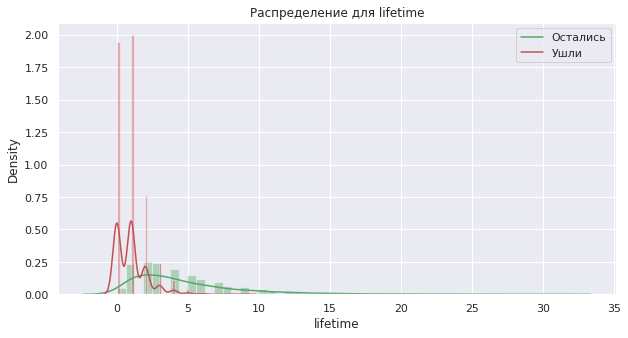

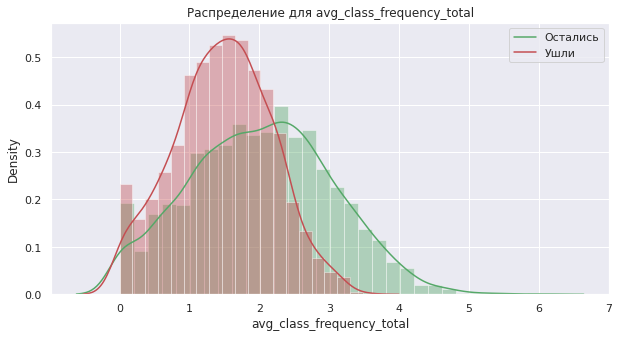

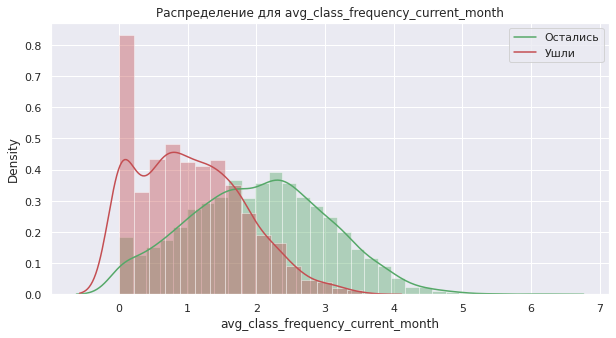

In [13]:
column = df_gym.drop(columns =(['gender', 'near_location', 'partner','promo_friends', 'phone',
                              'group_visits', 'contract_period', 'churn'])).columns
for col in column:
    plt.figure(figsize=(10, 5))
    sns.distplot(mean_stay[col], color = 'g')
    sns.distplot(mean_out[col], color = 'r')
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение для ' + col)
    plt.show()

**Вывод**

Распределение по колонке age - чаше уходят люди до 25-28лет. Клиенты старше уходят чуть реже - основной пик приходится на возраст 30 лет и более.

Распределение по колонке avg_additional_charges_total - те клиенты, которые уходят, в основном тратят меньше на дополнительные услуги чем оставшиеся.

Распределение по колонке month_to_end_contract - у клиентов кто уходят до окончания действия абонемента остается месяц.

Распределение по колонке lifetime - Уходят в основном новички. Если клиент занимается 5 и более месяцев, то уход такого клиента маловероятен.

Распределение по колонке avg_class_frequency_total - клиенты, которые не посещают групповые занятия чаще попадают в отток.

Распределение по колонке avg_class_frequency_current_month - клиенты, которые посещают зал 1 - 2 раза в неделю уходят чаще.
Также, в отток попадают те, кто сходил в фитнес 1 раз в месяц либо не пришел вообще.

***Постройте матрицу корреляций и отобразите её***

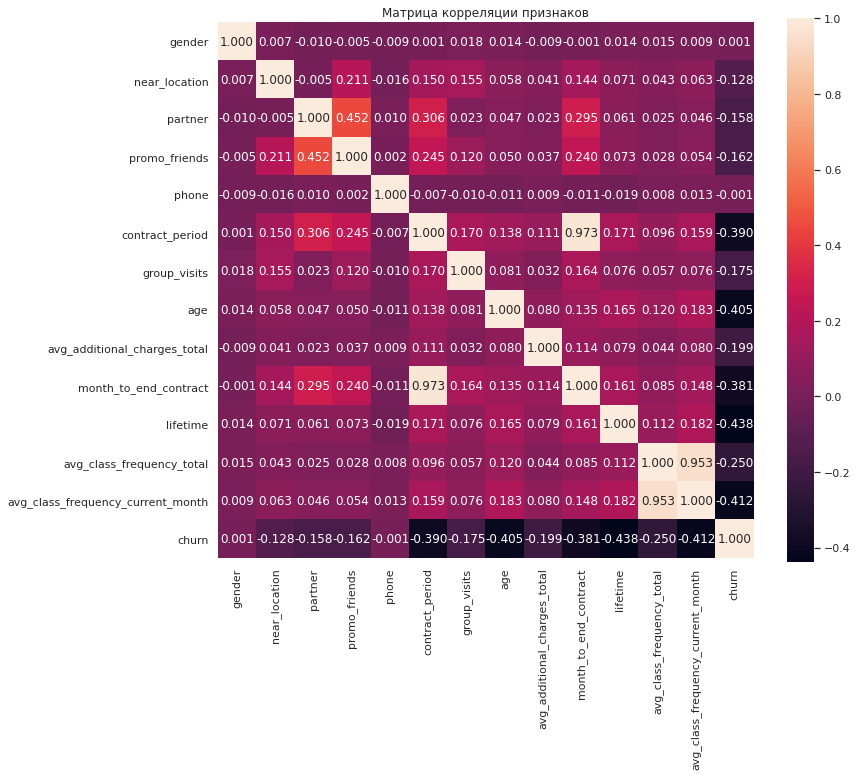

In [14]:
mc = df_gym.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(mc, annot=True, fmt = '.3f', square=True)
plt.title('Матрица корреляции признаков')
plt.show()

**Вывод**

По матрице корреляций можно выделить, что сильно коррелируют признаки avg_class_frequency_total(частота посещений в неделю за всё время) avg_class_frequency_current_month (частота посещений в неделю за предыдущий месяц) = 0,953, contract_period (длительность текущего абонемента) и month_to_end_contract (количество месяцев до окончания абонемента) = 0,973.

### Шаг 3. Постройте модель прогнозирования оттока клиентов

***Разбейте данные на обучающую и валидационную выборку***

Разобьём данные на обучающую и валидационную выборку. Создадим переменную Х с признаками. Также, создадим переменную y c целевой переменной.

In [15]:
X = df_gym.drop('churn', axis=1)
y = df_gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

***Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом***

Обучим модель логистической регрессией и выведем результаты метрик

In [17]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
print('Метрики для модели логистической регрессии:')
print('accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('f1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Метрики для модели логистической регрессии:
accuracy: 0.94
precision: 0.90
recall: 0.85
f1: 0.87


Обучим модель случайного леса и выведем результаты метрик

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
print('Метрики Логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Метрики Логистической регрессии
Accuracy: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85


**Вывод**

Из исследования можно видеть, что модели практически не отличаются. Но можно сказать, что логистическая регрессия показала себя чуть лучшие и может предсказывать отток клиента более уверенно.

### Шаг 4. Сделайте кластеризацию клиентов

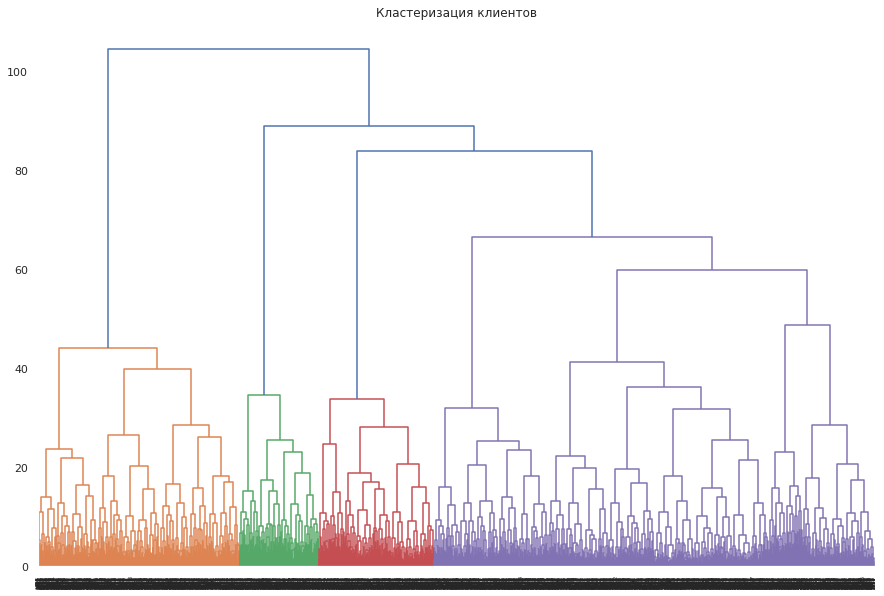

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show()

Если посмотреть на дендрограмму, то можно увидеть, что клиенты разделены на 4 кластера. Фиолетовая часть вышла больше чем остальные три. Алгоритмом K-Means можно разделить ее еще на 2 кластера.

***Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов***

Обучим модель кластеризации алгоритмом KMeans

In [20]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(df_gym)
df_gym['cluster'] = labels

***Посмотрите на средние значения признаков для кластеров***

Выведем средние значения признаков для кластеров

In [21]:
df_gym.groupby('cluster').mean().T.style.set_precision(2)

cluster,0,1,2,3,4
gender,0.51,0.51,0.47,0.51,0.52
near_location,0.84,0.84,0.86,0.82,0.88
partner,0.45,0.50,0.52,0.49,0.51
promo_friends,0.28,0.32,0.33,0.29,0.35
phone,0.90,0.90,0.93,0.91,0.90
contract_period,4.30,4.76,5.82,4.20,5.40
group_visits,0.41,0.42,0.43,0.39,0.43
age,28.97,29.40,29.85,28.91,29.34
avg_additional_charges_total,105.93,174.87,356.48,35.60,250.98
month_to_end_contract,4.00,4.38,5.38,3.86,5.00


***Посмотрим отдельные графики по кластерам***

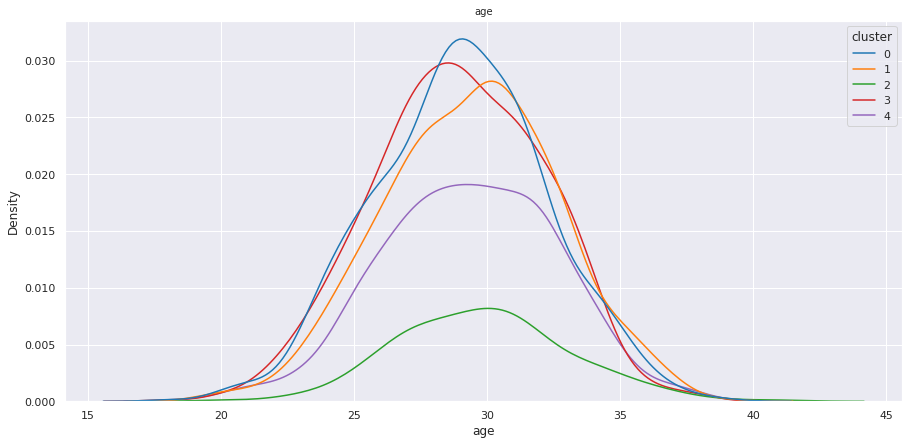

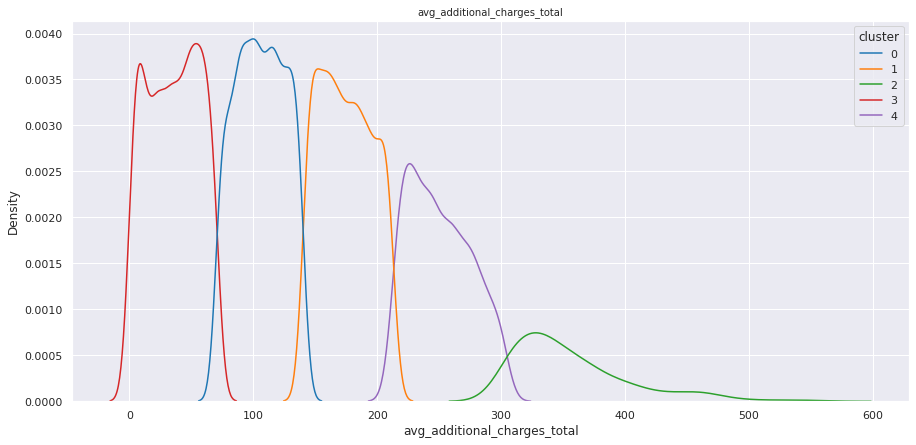

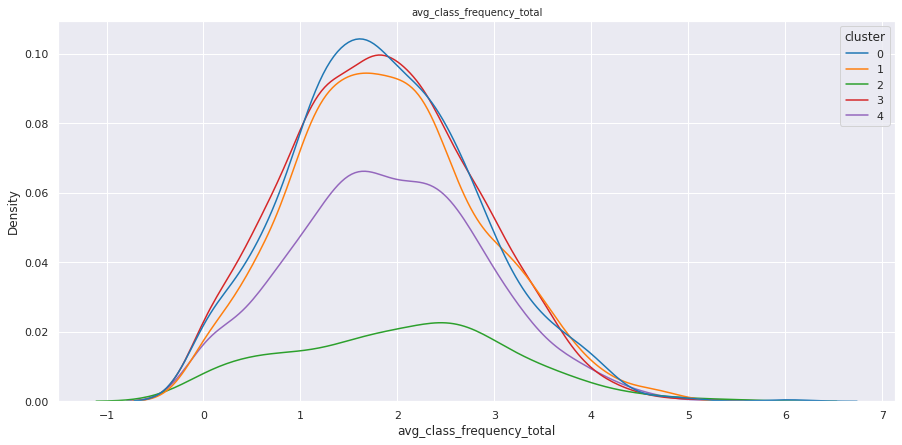

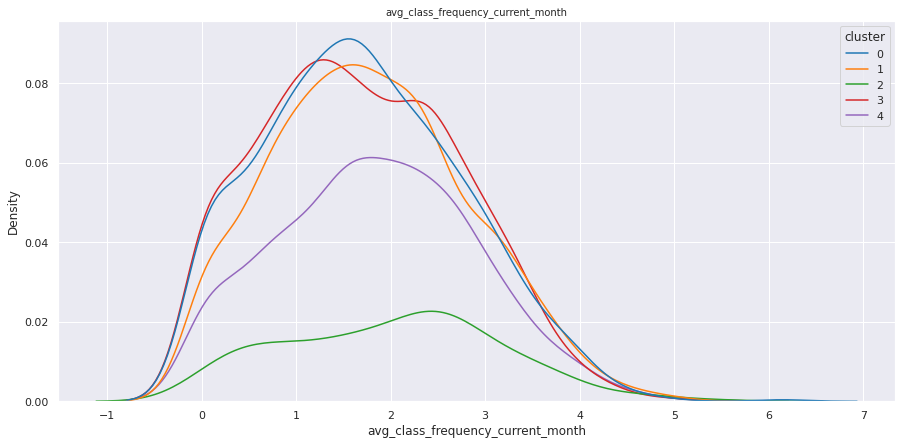

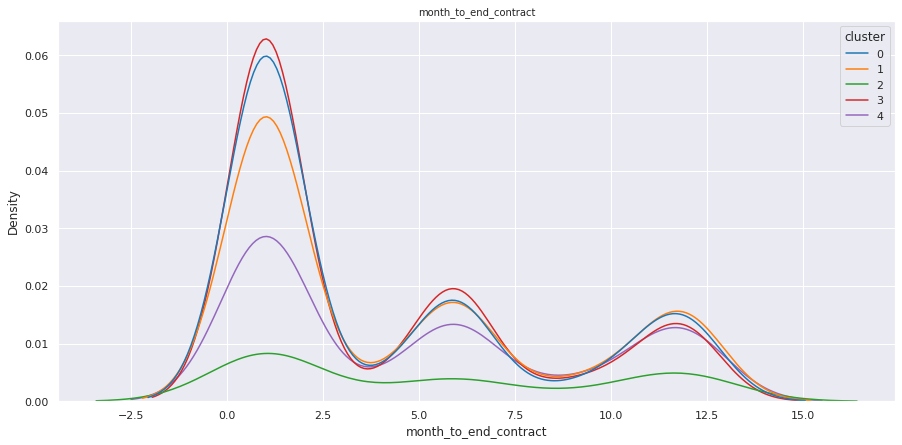

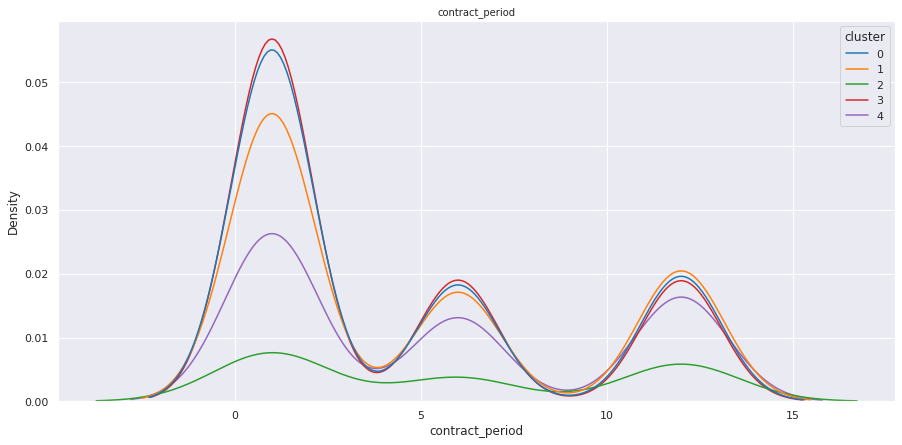

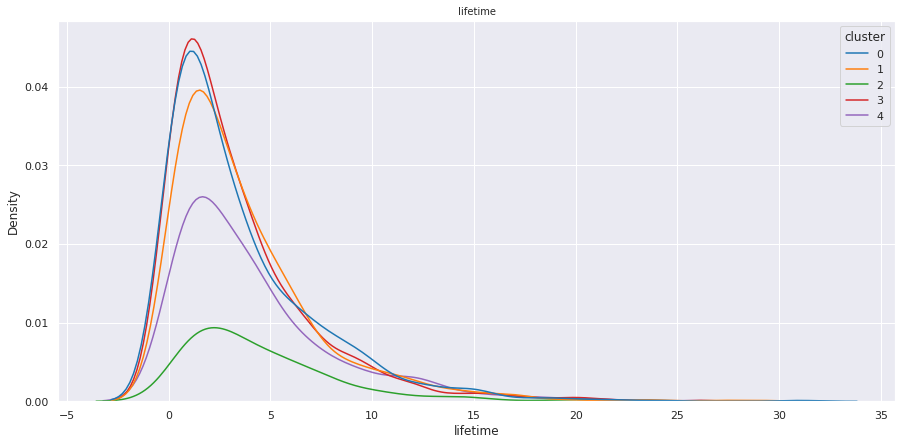

In [22]:
for column in ['age', 'avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month',
                    'month_to_end_contract', 'contract_period', 'lifetime']:
    plt.figure(figsize=(15, 7))
    plt.title(column, fontsize=10)   
    sns.kdeplot(data = df_gym, x = column, hue = 'cluster', palette='tab10')
    plt.show()  

***Рассмотрим графики для признаков по кластерам***

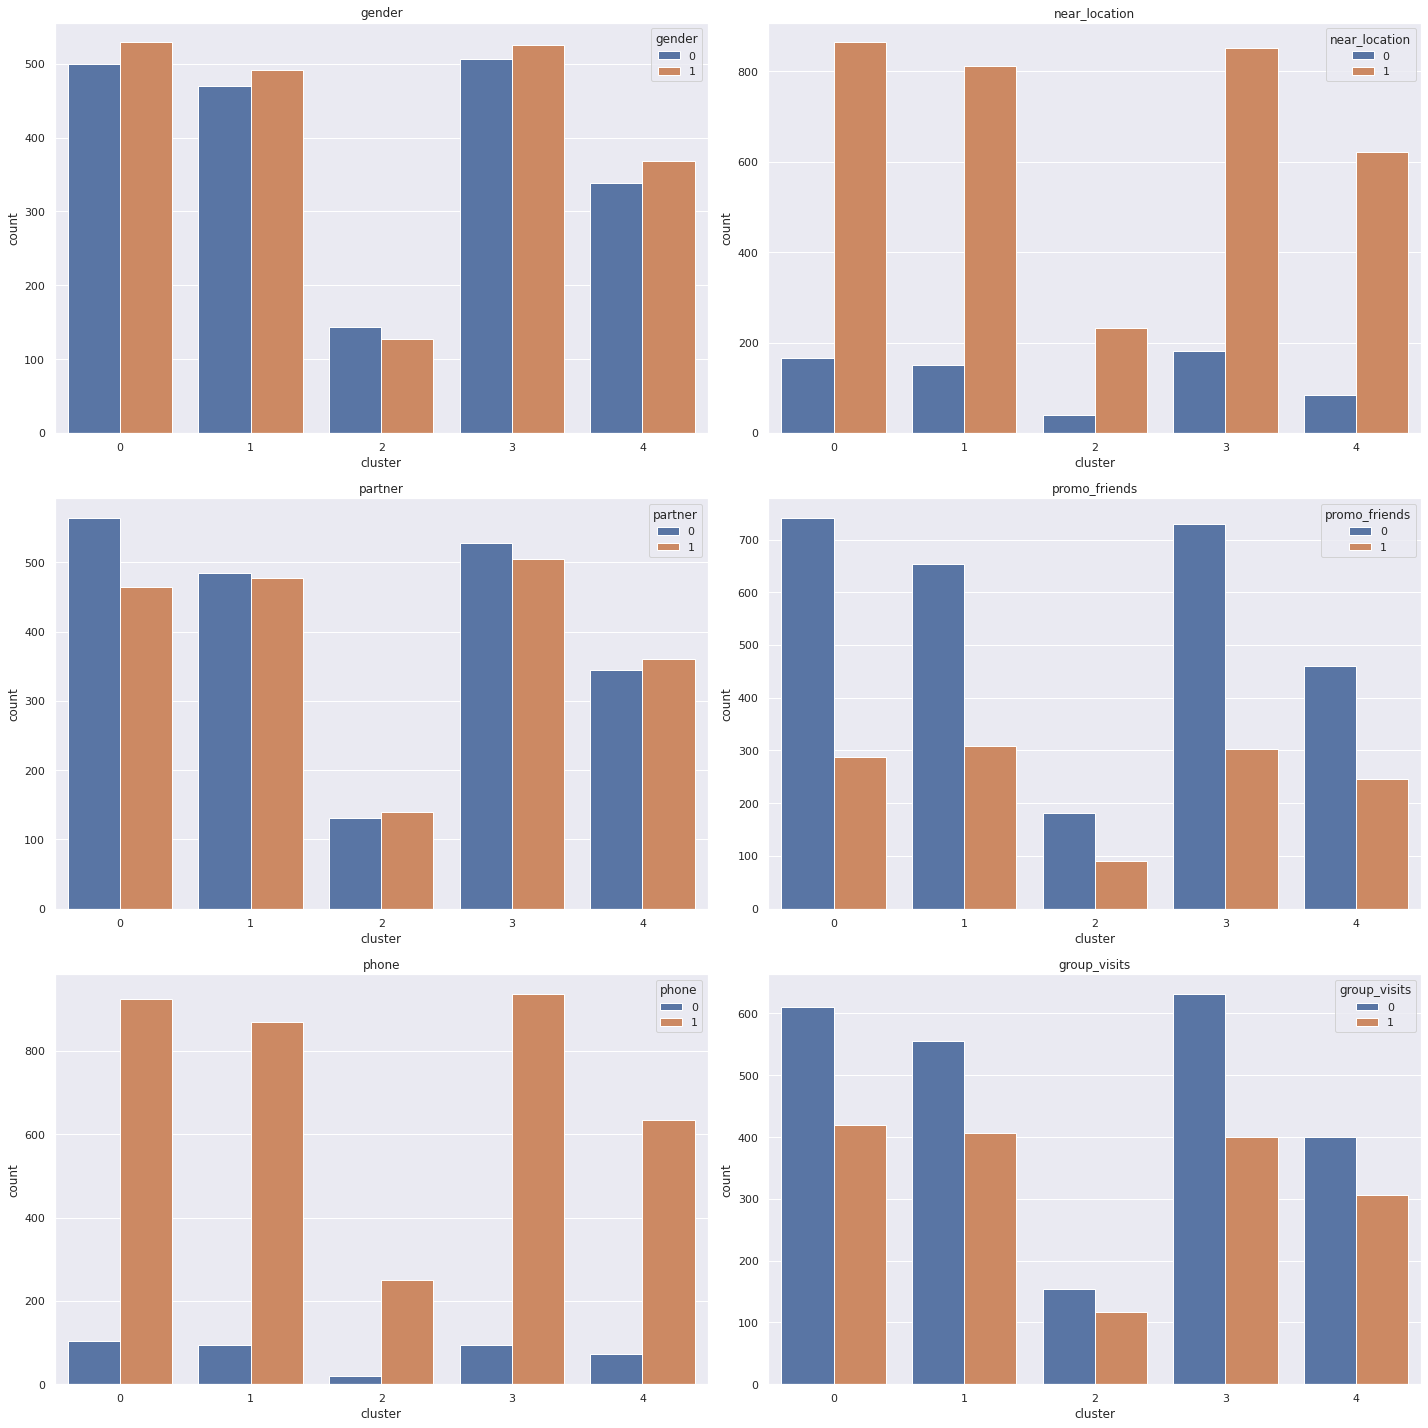

In [23]:
cluster_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

number_row = int(len(cluster_features)/2)

fig, ax = plt.subplots(nrows = number_row, ncols=2, figsize=(20, 20))
ax = ax.flatten()

for i in range(len(cluster_features)):
    sns.countplot(x='cluster', hue=cluster_features[i], data=df_gym, ax=ax[i])
    ax[i].set_title(f'{cluster_features[i]}')

fig.tight_layout()
fig.show()

***Для каждого полученного кластера посчитайте долю оттока***

In [29]:
df_gym.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn', ascending=False)

,churn
cluster,
3,0.35
0,0.33
1,0.23
4,0.18
2,0.04


**Вывод**

В нулевом кластере большая доля оттока. Эти клиенты реже пользуются групповыми занятиями, дают меньше выручки с дополнительных услуг. Также, меньше приходят по приглашению и реже являются партнерами. Еще у них имеются краткосрочные абонементы, мало посещают зал и пришли недавно.

В первом кластере 962 клиента (22% отток). Это клиенты начали стабильно ходить в фитнес-центр и пользоваться дополнительными услугами. Эти клиенты имеют среднюю активность. Среди этих клиентов много тех, кто потенциально может перейти в статус постоянных и перейти в 4 и 2 кластеры.

Во втором кластере клиенты, которые дают высокую среднюю выручку от дополнительных услуг и у них большой показатель lifetime, посещения групповых занятий, близости к фитнес-центру и приглашений от друзей и частоты посещения в целом. Также, большой показатель партнерства. Сюда, кстати, потенциально могут перейти клиенты из первого кластера. Эти клиенты имеют самые низкие показатели оттока и часто ходят в зал на тренировки.

В третьем кластере клиенты имеют наибольшую долю оттока. Они показывают наименьшие значения выручки с дополнительных услуг. Также, реже пользуются групповыми занятиями, меньше приходят по приглашению друзей и меньше всего являются партнерами. Клиенты из этого кластера пришли недавно и имеют абонементы на маленький срок. Также, меньше всех посещают тренировки.

В четвертом кластере 706 клиентов, доя оттока около 18%. Эти клиенты чуть меньше проявляют активности чем клиенты второго кластера. Меньше приобретают дополнительных услуг и чуть реже занимаются. Работают и живут эти клиенты рядом с центром. Также высокий показатель lifetime. Низкий показатель оттока.

### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

**Общий вывод**

При загрузки, обработки и изучении данных больших ошибок не обнаружено. Дубликаты и пропуски отсутствуют. В датафрейме df_gym присутствует 14 столбцов, он состоит из 4000 строк. Вес 437.6 KB. Названия столбцов в датафрейме приведены к нижнему регистру. Данные выглядят равномерно распределенными, стандартные отклонения не сильно далеки от средних. Также, не похоже, что есть какие-то выбросы.

При построении столбчатых гистограмм и распределении признаков было видно, что:

* пол всё же не влияет на отток клиентов.

* остаются больше те, кто живет или работают рядом.

* ушедших клиентов все же меньше тех, кто является партнером.

* уходят больше тех, кто пришел без промо.

* остаются те, кто оставлял свои контактные данные.

* уходят больше те, у кого длительность текущего абонемента составляет один или три месяца.

* те, кто не посещали групповые занятия уходят больше.

По матрице корреляций увидели, что сильно коррелируют признаки avg_class_frequency_total(частота посещений в неделю за всё время) avg_class_frequency_current_month (частота посещений в неделю за предыдущий месяц) = 0,953, contract_period (длительность текущего абонемента) и month_to_end_contract (количество месяцев до окончания абонемента) = 0,973.

При изучении данных можно видеть что:

* чаше уходят люди до 25-28 лет. Клиенты старше уходят чуть реже - основной пик приходится на возраст 30 лет и более.

* клиенты, которые уходят, в основном тратят меньше на дополнительные услуги чем оставшиеся.

* у клиентов кто уходят до окончания действия абонемента остается месяц.

* уходят в основном новички. Если клиент занимается 5 и более месяцев, то уход такого клиента маловероятен.

* клиенты, которые не посещают групповые занятия чаще попадают в отток.

* клиенты, которые посещают зал 1 - 2 раза в неделю уходят чаще. Также, в отток попадают те, кто сходил в фитнес 1 раз в месяц либо не пришел вообще.

При рассмотрении кластеризации выявили 5 кластеров клиентов:

* В нулевом кластере большая доля оттока. Эти клиенты реже пользуются групповыми занятиями, дают меньше выручки с дополнительных услуг. Также, меньше приходят по приглашению и реже являются партнерами. Еще у них имеются краткосрочные абонементы, мало посещают зал и пришли недавно.

* В первом кластере 962 клиента (22% отток). Это клиенты начали стабильно ходить в фитнес-центр и пользоваться дополнительными услугами. Эти клиенты имеют среднюю активность. Среди этих клиентов много тех, кто потенциально может перейти в статус постоянных и перейти в 4 и 2 кластеры.

* Во втором кластере клиенты, которые дают высокую среднюю выручку от дополнительных услуг и у них большой показатель lifetime, посещения групповых занятий, близости к фитнес-центру и приглашений от друзей и частоты посещения в целом. Также, большой показатель партнерства. Сюда, кстати, потенциально могут перейти клиенты из первого кластера. Эти клиенты имеют самые низкие показатели оттока и часто ходят в зал на тренировки.

* В третьем кластере клиенты имеют наибольшую долю оттока. Они показывают наименьшие значения выручки с дополнительных услуг. Также, реже пользуются групповыми занятиями, меньше приходят по приглашению друзей и меньше всего являются партнерами. Клиенты из этого кластера пришли недавно и имеют абонементы на маленький срок. Также, меньше всех посещают тренировки.

* В четвертом кластере 706 клиентов, доя оттока около 18%. Эти клиенты чуть меньше проявляют активности чем клиенты второго кластера. Меньше приобретают дополнительных услуг и чуть реже занимаются. Работают и живут эти клиенты рядом с центром. Также высокий показатель lifetime. Низкий показатель оттока.

**Рекомендации по работе с клиентами**



Тех, кто приходит впервые, можно мотивировать по-разному. Например, бесплатные посещения групповых занятий, либо включать в абонемент 1-2 бесплатных занятий с тренером. Можно включить в абонемент опцию приведи друга на несколько бесплатных посещений фитнес-центра. Либо, можно расширить временные рамки на этот бонус до 2-3х недель (как, например, это есть в моем фитнес абонементе). Также, если в фитнес-центре есть бассейн, то включить его в абонемент для бесплатных посещений в любое время. Еще, можно давать 1 бесплатный дополнительный месяц (13й), если человек покупает абонемент на 1 год.

Также, можно дать какие-нибудь скидки или бонусы на дополнительные услуги при покупке долгосрочных абонементов, чтобы стимулировать более частые посещения фитнес-центра. Проводить акции со скидками.

Можно, также, внедрить программу отслеживания лояльности клиентов, тем самым повысить качество индивидуального подхода и улучшить точность прогноза оттока. А если у фитнес-центра есть свое мобильное приложение, в котором есть вся информация по клиентам, информация по всем видам предоставляемых услуг и новостным сводкам по фитнес-центру, то это в разы может облегчить получение информации клиентом (ведь всем сейчас удобно пользоваться мобильными приложениями) и дать дополнительную информацию по клиентам фитнес-центру.

Всё это может дать не только увеличение выручки с продажи абонементов, но и увеличить доход с дополнительных продаж некоторых услуг и спорт товаров, которые продаются в центре. Это увеличивает шанс того, что клиент продолжит пользоваться услугами фитнес-центра и может пригласить своих друзей по своей рекомендации.